In [1]:
import os
#importing standard library
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#importing pyplot module from matplotlib package
from matplotlib import patches
#patches = 2D regions of any shape
from PIL import Image
from IPython.display import clear_output
#clears the old output when new one is generated
from pathlib import Path

In [3]:
# Adding Function Attached To Mouse Callback
def drawLine(event,x,y,flags,params):
    global ixLineAdd,iyLineAdd,ixLineRemove, iyLineRemove, ix, iy, drawing, color, whichClick, imageHeight, imageWidth, lineAdd, lineRemove
    # Left Mouse Button Down Pressed
    if(event==1):
        drawing = True
        color = 255
        whichClick = 1
        ix = x
        iy = y
    # Right mouse button Down Pressed
    if(event==2):
        drawing = True
        color = 0
        whichClick = 2
        ix = x
        iy = y
    if(event==0):
        if(drawing==True):
            #For Drawing Line
            cv.line(imgTmp,pt1=(ix,iy),pt2=(x,y),color=(color,color,color),thickness=3)
            ix = x
            iy = y
            if(whichClick == 1):
                for i in range(0, 5):
                    if(((ix+i) < imageWidth) and ((ix-i) >= 0)):
                        #print(ix+i,i)
                        ixLineAdd.append(ix+i)
                    if(((iy+i) < imageHeight) and ((iy-i) >= 0)):    
                        iyLineAdd.append(iy+i)
                    if(((ix-i) >= 0) and ((ix+i) < imageWidth)):
                        ixLineAdd.append(ix-i)
                    if(((iy-i) >= 0) and ((iy+i) < imageHeight)):
                        iyLineAdd.append(iy-i)
            elif(whichClick==2):
                for i in range(0, 5):
                    if(((ix+i) < imageWidth) and ((ix-i) >= 0)):
                        #print(ix+i,i)
                        ixLineRemove.append(ix+i)
                    if(((iy+i) < imageHeight) and ( (iy-i) >= 0)):
                        iyLineRemove.append(iy+i)
                    if(((ix-i) >= 0) and ((ix+i) < imageWidth)):
                        ixLineRemove.append(ix-i)
                    if(((iy-i) >= 0) and ((iy+i) < imageHeight)):
                        iyLineRemove.append(iy-i)
                    #print(ixLineRemove,i)
     # Mouse button released
    if(event==4 or event==5):
        drawing = False
        if(len(iyLineAdd)>0 and len(ixLineAdd)>0):
            n = min(len(iyLineAdd), len(ixLineAdd))
            lineAdd = np.vstack((iyLineAdd[:n], ixLineAdd[:n])).T
            #iyLineAdd = np.unique(iyLineAdd, axis=0)
            #ixLineAdd = np.unique(ixLineAdd, axis=0)
        if(len(iyLineRemove)>0 and len(ixLineRemove)>0):
            n = min(len(iyLineRemove), len(ixLineRemove))
            lineRemove = np.vstack((iyLineRemove[:n], ixLineRemove[:n])).T
            #iyLineRemove = np.unique(iyLineRemove, axis=0)
            #ixLineRemove = np.unique(ixLineRemove, axis=0)
        
def drawRect(event,x,y,flags,params):
    global ix,iy,ix2,iy2,drawing
    # Left Mouse Button Down Pressed
    if(event==1):
        drawing = True
        ix = x
        iy = y
    # Mouse button released
    if(event==4):
        drawing = False
        cv.rectangle(imgTmp,pt1=(ix,iy),pt2=(x,y),color=(255,255,255),thickness=3)
        ix2=x
        iy2=y               

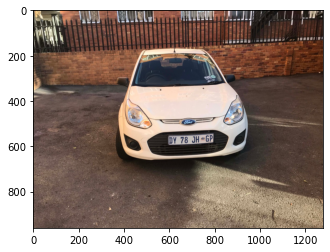

In [4]:
# Setup image and mask

#Insert your file name and extension here
fileName = 'rgvd-1.jpg'
img = cv.imread(fileName)[:,:,::-1]
mask = np.zeros(img.shape[:2],np.uint8)

# GrabCut parameters
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
imageHeight = img.shape[:2][0]
imageWidth = img.shape[:2][1]

#Show image
figure, ax = plt.subplots(1)
ax.imshow(img)

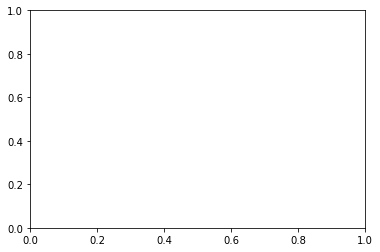

In [5]:
drawing = False
ix, iy, ix2, iy2 = -1, -1, -1, -1
imgTmp = img.copy()
originalImage = img.copy()
# Making Window For The Image
cv.namedWindow("Select the foreground with a rectangle")

# Adding Mouse CallBack Event
cv.setMouseCallback("Select the foreground with a rectangle",drawRect)

# Starting The Loop So Image Can Be Shown and allow exit on "Q" key pressed
while(True):
    cv.imshow("Select the foreground with a rectangle",imgTmp)
    if cv.waitKey(20) & 0xFF == ord('q'):
        break
cv.destroyAllWindows()
figure, ax = plt.subplots(1)


In [6]:
# Rectangle info for foreground, conditions so the rectangle works in every way
if(ix2 <ix):
    ix2, ix = ix, ix2
if(iy2<iy):
    iy2, iy = iy, iy2
# Save the rectangle's information
width = abs(ix2-ix)
height = abs(iy2-iy)
xStart = ix
yStart = iy

# Show rectangle including foreground item on image
rect = patches.Rectangle((ix ,iy),width ,height , edgecolor='r', facecolor="none")
ax.imshow(img)
ax.add_patch(rect)
rect = (xStart,yStart,width,height)

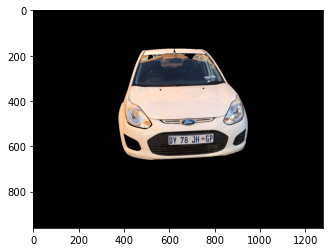

In [7]:
# Grabcut algorithm with rectangle for foreground item
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

# Show current image only with rectangle
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img)